## Model Tuning

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier


seed = 23

drop_cols = [
    'Unnamed: 0'
]

df_ref = {
    'phone': pd.read_csv('data/csv/grouped_phone.csv').drop(columns=drop_cols),
    'watch': pd.read_csv('data/csv/grouped_watch.csv').drop(columns=drop_cols)
}

model_ref = {
    'Decision Tree': DecisionTreeClassifier(random_state=seed),    
}

df_ref['phone']['code'] = df_ref['phone']['code'].astype('category')
df_ref['watch']['code'] = df_ref['watch']['code'].astype('category')

In [2]:
socres_agg = {
    'device': [],
    'DT_score': [],
    'features': [],
    'model': []
}

for f in ['cos', 'sum', 'mean', 'all']:
    for device, df in df_ref.items():
        f_cols = df.columns[1:]
        if f != 'all':
            f_cols = [c for c in f_cols if f in c]
        
        X = StandardScaler().fit_transform(df[f_cols])
        y = df['code']

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.25, random_state=seed
        )
        
        for model, clf in model_ref.items():
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)

            socres_agg['features'].append(f)
            socres_agg['device'].append(device)
            socres_agg['DT_score'].append(score) 
            socres_agg['model'].append(clf) 

scores_df = pd.DataFrame(socres_agg)

In [3]:
scores_df = scores_df.sort_values('DT_score', ascending=False)
print(scores_df)

  device  DT_score features                                    model
6  phone  0.744604      all  DecisionTreeClassifier(random_state=23)
4  phone  0.742124     mean  DecisionTreeClassifier(random_state=23)
2  phone  0.685264      sum  DecisionTreeClassifier(random_state=23)
7  watch  0.578583      all  DecisionTreeClassifier(random_state=23)
5  watch  0.573097     mean  DecisionTreeClassifier(random_state=23)
3  watch  0.536448      sum  DecisionTreeClassifier(random_state=23)
0  phone  0.211519      cos  DecisionTreeClassifier(random_state=23)
1  watch  0.193466      cos  DecisionTreeClassifier(random_state=23)


## Best Model Confusion Matrix


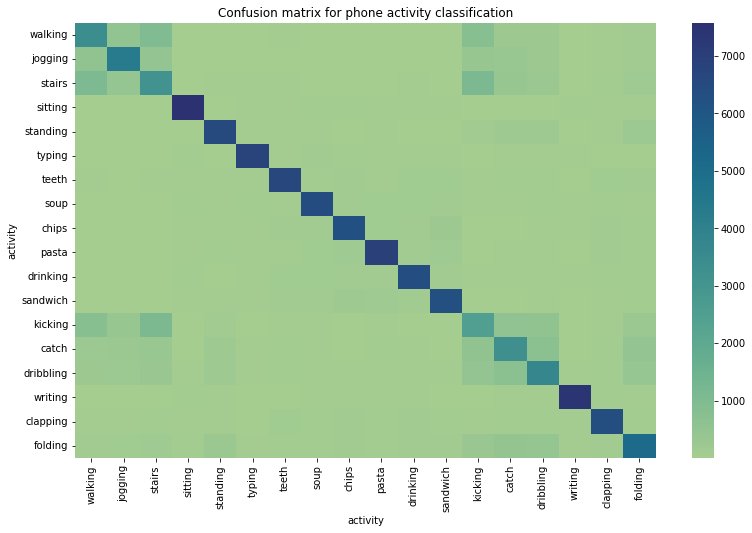

In [4]:
activity_key_url = r"https://raw.githubusercontent.com/gojandrooo/DSE-230/main/data/activity_key.txt"

#read the activity table from gtihub
activity_key = pd.read_csv(activity_key_url, header=None)

#split the data into a proper table
activity_key = activity_key[0].str.replace(" ", "").str.split("=", expand=True)
activity_key.columns = ['activity', 'code']

X = StandardScaler().fit_transform(df_ref['phone'][df_ref['phone'].columns[1:]])
y = df_ref['phone']['code']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=seed
)
clf = DecisionTreeClassifier(random_state=seed)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
results = pd.DataFrame(confusion_matrix(y_test, predictions, labels=activity_key['code']))
results.columns = activity_key['activity']
results.set_index(activity_key['activity'], drop=False, inplace=True) 
plt.figure(figsize = (13,8))
plt.title('Confusion matrix for phone activity classification')
sns.heatmap(results, cmap = 'crest')
plt.show()